   # 🛳️ **Titanic Survival Prediction**  

   ### 👩🏻‍🔧 **By Rosy**




# ***🎯 Goals & Tasks*** 

 ### 1. Provide Insights by Storytelling with Data. 📊 
    
 ### 2. Make a Prediction through Machine Learning. 🤖
     

# ***🗂️ Import Libraries*** 

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp 
import missingno as msno 
sns.set() 

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 

import warnings  
warnings.filterwarnings('ignore')     

# ***⏳ Data Loading*** 

In [2]:
os.listdir('/kaggle/input/titanic-data')  
df = pd.read_csv('/kaggle/input/titanic-data/train.csv')    

# ***🔭 Data Overview***   

### 1. 🔍 **Take a Glimpse of Data**

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 🔍 **DataType of Each Column**

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. 🔍 **Dimensions of the DataFrame**

In [5]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')  

Rows: 891
Columns: 12


### 4. 🔍 **Descriptive Statistics for numerical & categorical variables**

In [6]:
round(df.describe(), 3)   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [7]:
categorical_var = df.dtypes[df.dtypes=='object'].index 
df[categorical_var].describe() 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 5. 🔍 **Missing & Duplicated Values**

In [8]:
missing_counts = df.isnull().sum().sort_values(ascending=False) 

missing_df = pd.DataFrame({
    'No. of Missing Values': missing_counts,
    '% of Missing Values': round(missing_counts/len(df)*100, 3)  
}) 

missing_df.style.background_gradient('magma')  

,No. of Missing Values,% of Missing Values
Cabin,687,77.104000
Age,177,19.865000
Embarked,2,0.224000
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


<Axes: >

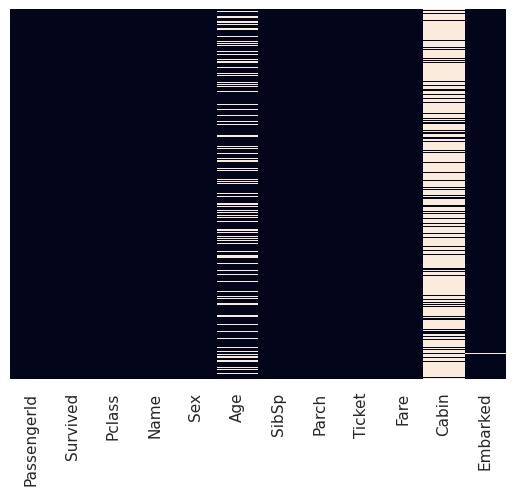

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)   

In [10]:
df.duplicated().sum() 

0

###  📝 ***Conclusions from Data Exploration***

1. The columns have float datatypes are 2, integer datatype are 5, object datatype are 5. 

2. There are 891 rows and 12 columns in the DataFrame.

3. Column Cabin has 687 missing values, Column Age has 177 and Column Embarked has 2 missing values.

4. For Column Age, the maximum age is 80, and the minimum is 0.42 years old.

5. The maximum fare is 512.329.  

# 🔨  ***EDA with Visualization & Data Cleaning***  

### 1.1 🔍 **Col: PassengerId**

*  "PassengerId" is an arbitrary identifier assigned to each passenger, so I decide to delete it.

In [11]:
df.drop(['PassengerId'], axis=1, inplace=True)        

###  **1.2 Survivial Distribution for Passengers**

In [12]:
sns.set_palette('Dark2')  

Text(0.5, 1.0, 'Countplot of Survival Status')

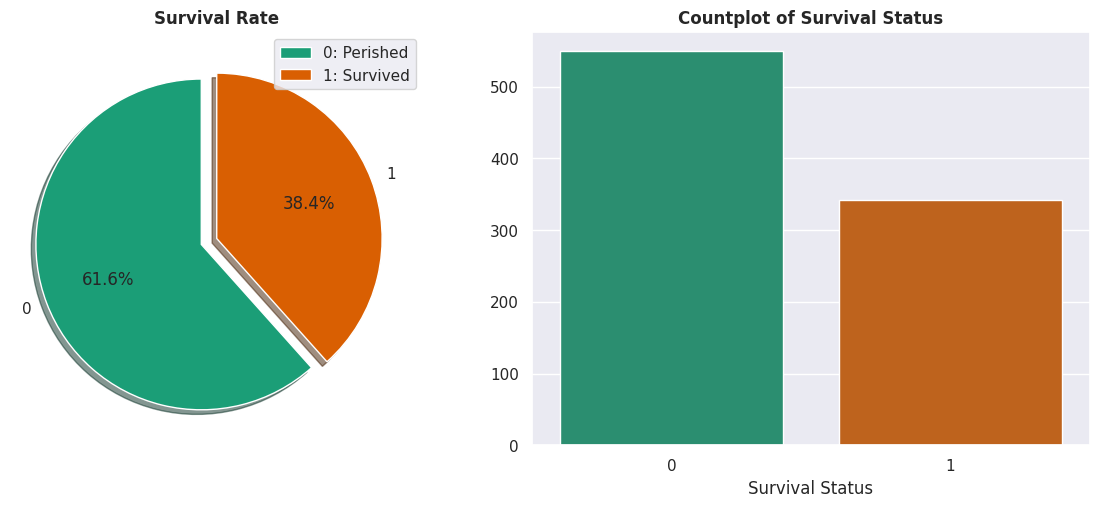

In [13]:
fig, axes = plt.subplots(1,2,figsize=(12,5)) 

df['Survived'].value_counts().plot(kind='pie',
                                   startangle= 90, 
                                   autopct = '%1.1f%%',
                                   explode = [0.1,0],
                                   shadow=True,
                                   ax=axes[0])  

axes[0].set(ylabel='') 
axes[0].set_title('Survival Rate', fontweight='bold') 
legend_map = {0:'0: Perished',
             1: '1: Survived'} 
axes[0].legend(labels=[legend_map[0],legend_map[1]])
plt.tight_layout() 

sns.countplot(data=df,
              x='Survived', 
              ax=axes[1]) 

axes[1].set(ylabel='',
            xlabel='Survival Status')    
axes[1].set_title('Countplot of Survival Status',
                 fontweight='bold')

### 📝 ***Note*** :  

* **The dataset is imbalanced with 38.4% survivors and 61.6% non-survivors.** 

### 2.1 🔍  **Col: Sex (Categorical Variables)**

Text(0.5, 1.0, 'Countplot of Survival Status by Sex')

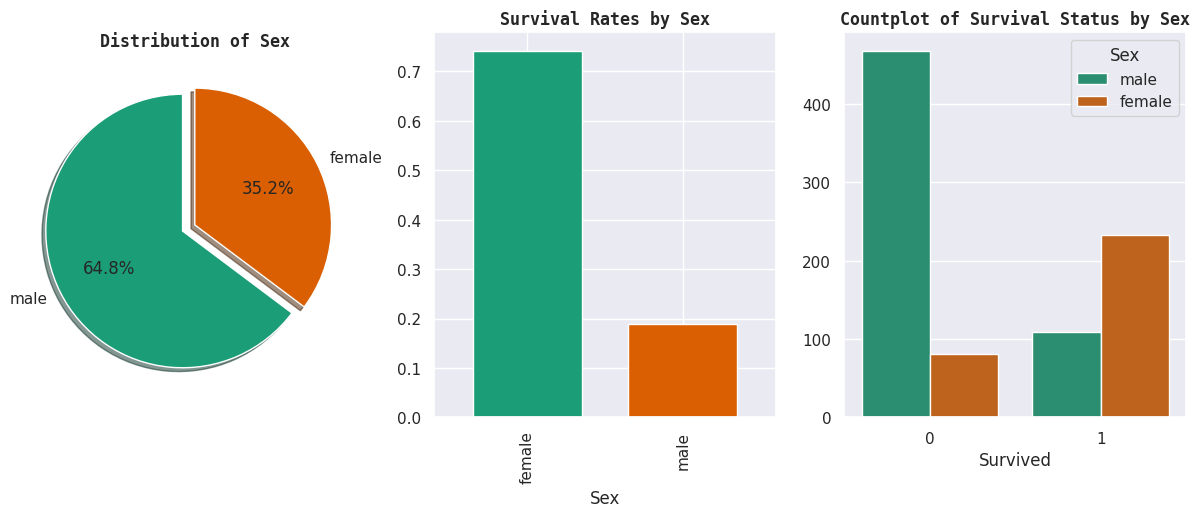

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15,5)) 

df['Sex'].value_counts().plot(kind='pie',
                              autopct='%1.1f%%',
                              startangle=90,
                              explode=[0.1,0],
                              shadow=True,
                               ax=axes[0])

axes[0].set(ylabel='')
axes[0].set_title('Distribution of Sex', fontweight='bold', fontfamily='monospace')



df.groupby('Sex')['Survived'].mean().plot(kind='bar',
                                          width=0.7,
                                          color=['#1b9e77', '#d95f02'],
                                          ax=axes[1]) 
axes[1].set_title('Survival Rates by Sex', fontweight='bold', fontfamily='monospace' )



sns.countplot(data=df, 
              x='Survived', 
              hue='Sex',
              ax=axes[2]) 
axes[2].set(ylabel='')  
axes[2].set_title('Countplot of Survival Status by Sex', fontweight='bold', fontfamily='monospace' )

### 📝 ***Note*** :  

* **The pie chart reveals a notable gender disparity among Passengers, with males comprising a substantial majority(64.8%) compared to females(35.2%).**

* **However, male passengers exhibited a drastically lower survival rate which was below 20%(over 450 perished), while females demonstrated a higher survival patteren at nearly 75%.**  

### **2.2 Binary Encoding for Sex**

In [15]:
df['Sex'] = df['Sex'].map({'male':0,
                           'female':1})     

### 3.1 🔍 **Col: Age (Continuous Variables)** 

In [16]:
df['Age'].describe()  

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

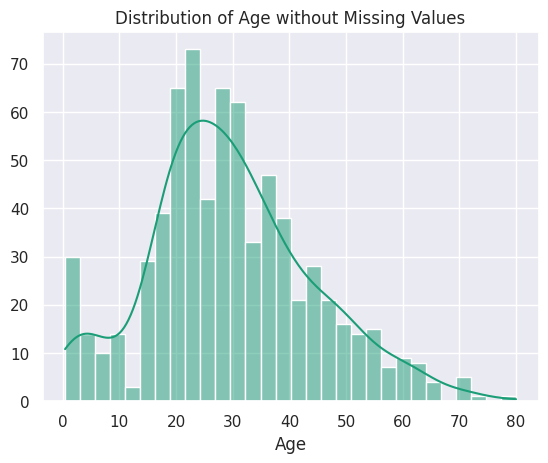

In [17]:
sns.histplot(data=df, 
            x=df['Age'].dropna(),
            bins=30, 
            kde=True) 

plt.ylabel('')
plt.title('Distribution of Age without Missing Values')
plt.show() 

### **3.2 Predictive Mean Matching for Imputing Ages:**

In [18]:
# Figure out the missing pattern of age: 

missing_age = df.groupby(['Pclass','Sex'], as_index=False)['Age'].apply(lambda x: x.isnull().sum())
 
missing_age 

,Pclass,Sex,Age
0,1,0,21
1,1,1,9
2,2,0,9
3,2,1,2
4,3,0,94
5,3,1,42


### 📝 ***Note*** :  

*  **Ages are numerical features, which is suitable for Predictive Mean Matching(PMM).**
   
*  **It's not normally distributed, a skewness towards younger passengers between 20-30 years old. --> PMM will preserve the original distribution of observed data.**

   
*  **I identified a patteren where missing ages are related to Passenger Class (the total count of missing ages in Class 3 is 136/177), and particularly higher among males among three classes. --> This suggests the data is not Missing Completely At Random(MCAR), but rather Missing At Random(MAR).** 

In [19]:
# Apply Predictive Mean Matching to Impute Ages:  

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor 


features = ['Pclass', 'Sex']   
df_pmm = df[features+['Age']].copy()  

imputer = IterativeImputer(estimator=RandomForestRegressor(min_samples_leaf=10), 
                           initial_strategy='mean', 
                           imputation_order='random',
                           random_state=42)    
 
df_pm_imputed = imputer.fit_transform(df_pmm)   
df['Age_pmm'] = df_pm_imputed[:, -1]      

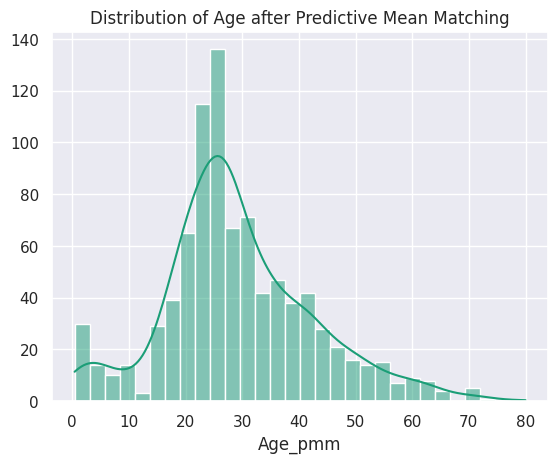

In [20]:
# check distribution after PMM: 

sns.histplot(data=df, 
            x='Age_pmm',
            bins=30, 
            kde=True) 


plt.ylabel('')
plt.title('Distribution of Age after Predictive Mean Matching')
plt.show()   

### 4. 🔍 **Col: Ticket**


In [21]:
df['Ticket'][0:10] 

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [22]:
df['Ticket'].describe()  

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

### 📝 ***Note*** : 

* **Ticket is a categorical variable that has **681 unique** values**.
   
* **Categorical variables with nearly as many levels as records are often not useful for prediction**.

### 5. 🔍 **Col: Cabin**  

In [23]:
df['Cabin'][0:10] 

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [24]:
df['Cabin'].describe()  

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

### 📝 ***Note*** : 

* **Column Cabin has 147 unique values, which may not be particularly useful for prediction.**

* **Create a boolean column that indicates if the cabin is missing.**

### 6. 🔍 **Passenger Class (Pclass)**  

Text(0.5, 1.0, 'Count of Survival Status in Three Classes')

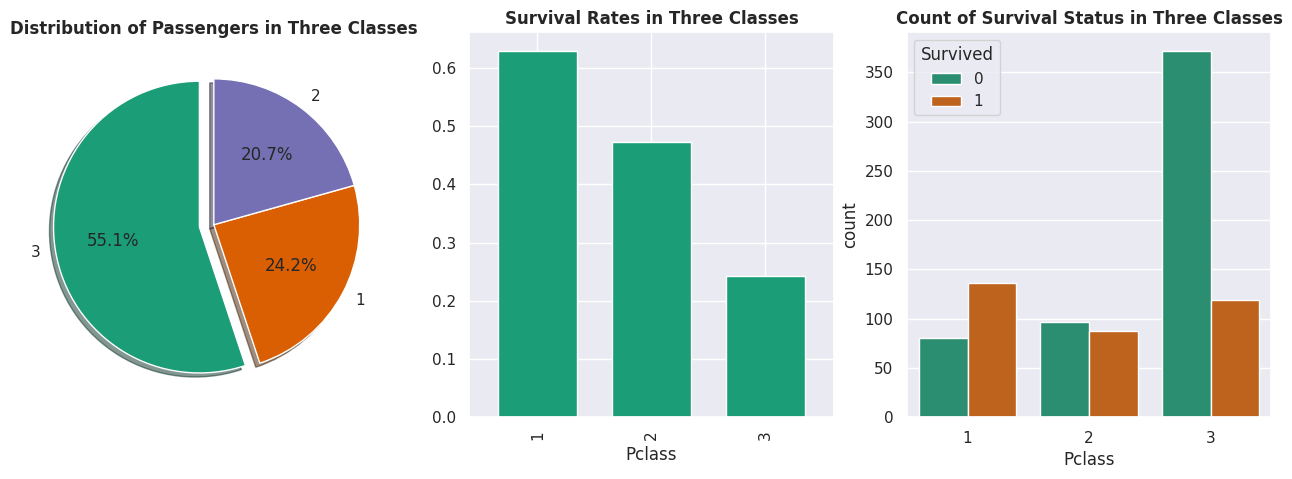

In [25]:
fig, axes = plt.subplots(1,3, figsize=(16,5)) 

df['Pclass'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 explode=[0.1,0,0],
                                 shadow=True,
                                 ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('Distribution of Passengers in Three Classes',
                  fontweight='bold')  


df.groupby('Pclass')['Survived'].mean().plot(kind='bar',
                                             width=0.7,
                                             ax=axes[1]) 

axes[1].set_title('Survival Rates in Three Classes',
                  fontweight='bold')


sns.countplot(data=df,
             x='Pclass', 
             hue='Survived',
             ax=axes[2])
axes[2].set_title('Count of Survival Status in Three Classes',
                  fontweight='bold')  

### 📝 ***Note*** :  

**Social Psychology Theory: The "just-world hypothesis" (Lerner, 1980)**

### 7.1 🔍 **Embarked**  

Text(0.5, 1.0, 'Embarked vs. Pclass')

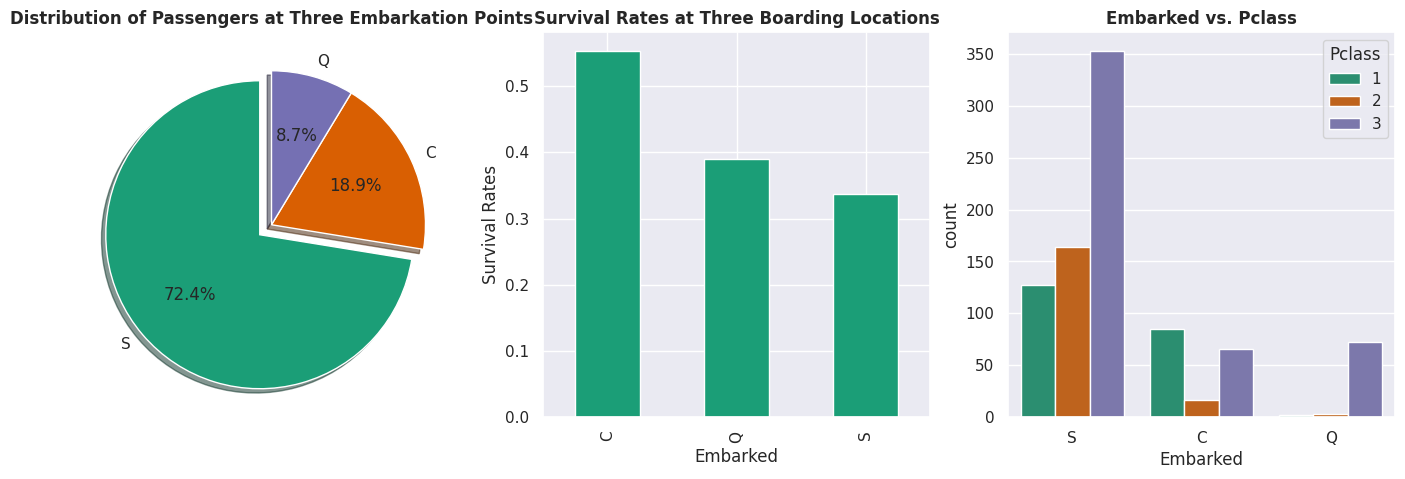

In [26]:
fig, axes = plt.subplots(1,3, figsize=(17,5)) 

df['Embarked'].value_counts().plot(kind='pie',
                                   startangle=90,
                                   autopct='%1.1f%%',
                                   explode=[0.1,0,0],
                                   shadow=True,
                                   ax=axes[0]) 
axes[0].set_ylabel('')
axes[0].set_title('Distribution of Passengers at Three Embarkation Points',
                    fontweight='bold') 



df.groupby('Embarked')['Survived'].mean().plot(kind='bar',
                                               ax=axes[1]) 
axes[1].set_ylabel('Survival Rates')
axes[1].set_title('Survival Rates at Three Boarding Locations',
                    fontweight='bold')   




sns.countplot(data=df,
             x='Embarked',
             hue='Pclass',
             ax=axes[2]) 
axes[2].set_title('Embarked vs. Pclass',
                  fontweight='bold') 

### **7.2 One-Hot Coding for Embarked**

In [27]:
embark = pd.get_dummies(df['Embarked'], drop_first=True, dtype=int) 
df = pd.concat([df, embark], axis=1)   

### 8.1 🔍 **Col: Fare**  

Text(0.5, 1.0, 'Distribution of Fares in Third Class')

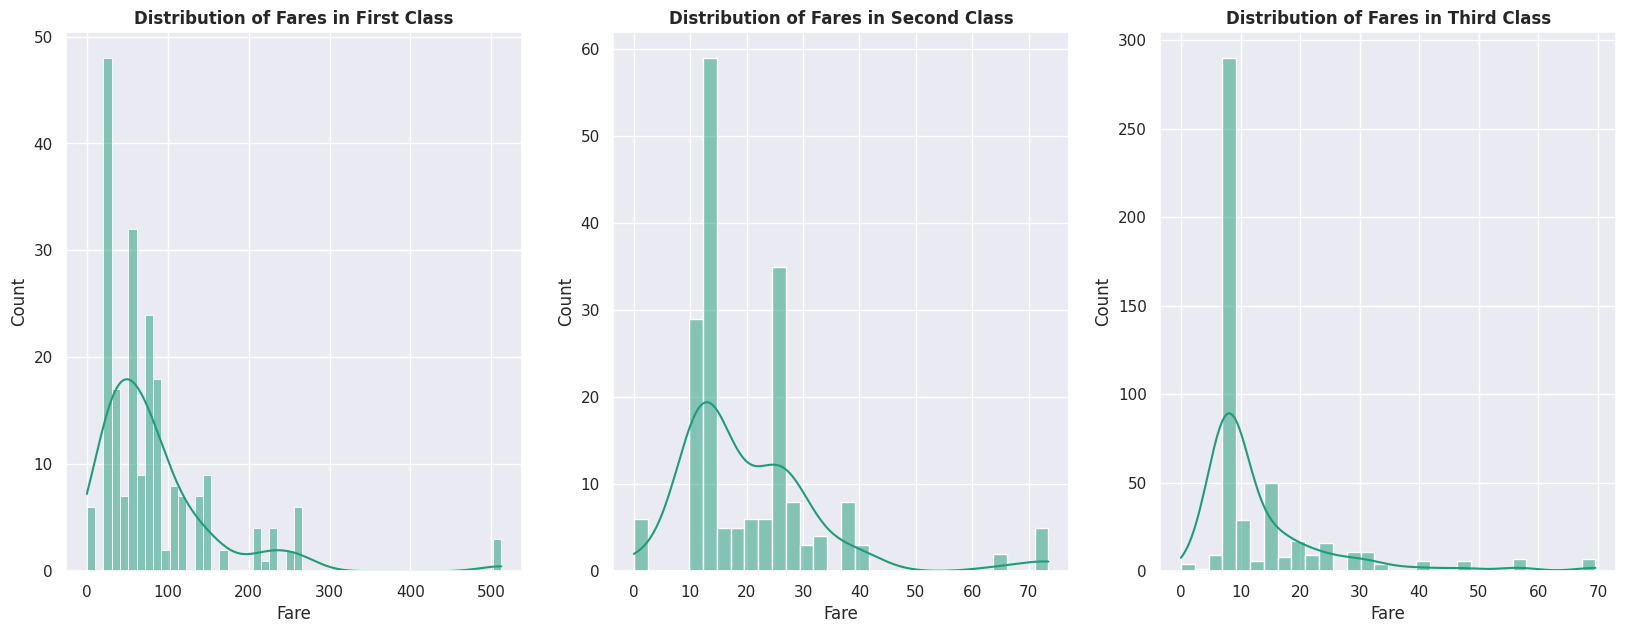

In [28]:
fig, axes = plt.subplots(1,3, figsize=(20,7))

sns.histplot(data = df[df['Pclass']==1]['Fare'],  
             bins=50,
             kde=True,
             ax=axes[0])
axes[0].set_title('Distribution of Fares in First Class',
                  fontweight='bold') 



sns.histplot(data = df[df['Pclass']==2]['Fare'], 
             bins=30,
             kde=True,
             ax=axes[1])
axes[1].set_title('Distribution of Fares in Second Class',
                  fontweight='bold') 



sns.histplot(data = df[df['Pclass']==3]['Fare'], 
             bins=30,
             kde=True,
             ax=axes[2])
axes[2].set_title('Distribution of Fares in Third Class',
                  fontweight='bold')  

### **8.2 Detect the Outliers in Fare**    

In [29]:
# Detect the Outliers of Fare:  

fig = px.box(data_frame=df,
             y='Fare',
             color='Pclass', 
             title='Detect Outliers of Fare', 
             width=700,
             height=400)
fig.show() 

In [30]:
highest_fare = np.where(df['Fare']==df['Fare'].max())
df.loc[highest_fare]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_pmm,Q,S
258,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,NaN,C,35.0,0,0
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,36.0,0,0
737,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,C,35.0,0,0


### 📝 ***Note*** :  

* **I found that the highest fare in Class2 and Class3 would not be more than 70.**
* **The shape of Fare in Class2 exhibated a bimodal distribution.**
* **The highest fares were three people from Class1 and they were all saved.**

# 🎥   ***Feature Engineering & Statistical Analysis***   

In [31]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Age_pmm   891 non-null    float64
 12  Q         891 non-null    int64  
 13  S         891 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 97.6+ KB


### 1. 🔨 **Age Binning**  

In [32]:
df['Age_Band']=0 
df.loc[df['Age_pmm']<12, 'Age_Band'] = 0                                     # Infancy --> Late Childhood  
df.loc[(df['Age_pmm']>=12) & (df['Age_pmm']<25), 'Age_Band'] = 1             # Late Childhood --> Emerging Adulthood 
df.loc[(df['Age_pmm']>=25) & (df['Age_pmm']<40), 'Age_Band'] = 2             # Emerging Adulthood --> Early Adulthood 
df.loc[(df['Age_pmm']>=40) & (df['Age_pmm']<60), 'Age_Band'] = 3             # Early Adulthood --> Middle Adulthood
df.loc[df['Age_pmm']>60, 'Age_Band'] = 4                                     # Middle Adulthood --> Late Adulthood  


# check: 
df.sample(2) 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_pmm,Q,S,Age_Band
524,0,3,"Kassem, Mr. Fared",0,NaN,0,0,2700,7.2292,NaN,C,26.553646,0,0,2
99,0,2,"Kantor, Mr. Sinai",0,34.0,1,0,244367,26.0000,NaN,S,34.000000,0,1,2


<Axes: xlabel='Age_Band'>

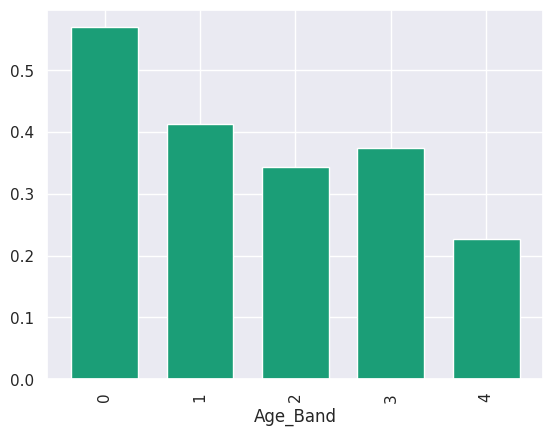

In [33]:
df.groupby('Age_Band')['Survived'].mean().plot(kind='bar',
                                               width=0.7) 


### 2. 🛠️ ***Feature Engineering of Ticket*** : 


        1. Extract prefix from tickets containing letters. 
        
        2. Create a new column that transforms prefixes to numeric values according to the mean of 'Survived' group by Passenger Class and Ticket_Prefix. 
        
        3. Create a boolean column indicating if the ticket is purely numeric.
        
        4. Count the frequency of each ticket.  

In [34]:
def extract_prefix(ticket):
    parts = ticket.replace('.', '').replace('/', '').split() 
    prefix = [p for p in parts if not p.isdigit()] 
    return prefix[0] if prefix else 'None' 

df['Ticket_Prefix'] = df['Ticket'].apply(extract_prefix) 

df['Pclass_Prefix_Survival_Rate']= df.groupby(['Pclass', 'Ticket_Prefix'])['Survived'].transform('mean')

df['Ticket_IsNumeric'] = df['Ticket'].apply(lambda x: x.isdigit()).astype(int)

ticket_counts = df['Ticket'].value_counts() 
df['Ticket_Frequency'] = df['Ticket'].map(ticket_counts)     

### 3. 🛠️ **Fare Binning**  

This method of binning is from the insights from histgrams above where the distribution of fare group by class.

In [35]:
df['Fare_Range'] = pd.qcut(df['Fare'],4)  

In [36]:
df['Fare_Band'] = 0 

df.loc[df['Fare']<=7.91, 'Fare_Band'] = 0 
df.loc[(df['Fare']>7.91) & (df['Fare']<=14.454), 'Fare_Band'] = 1 
df.loc[(df['Fare']>14.454) & (df['Fare']<=31.0), 'Fare_Band'] = 2
df.loc[(df['Fare']>31.0) & (df['Fare']<=512.329), 'Fare_Band'] = 3 

In [37]:
df.sample(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_pmm,Q,S,Age_Band,Ticket_Prefix,Pclass_Prefix_Survival_Rate,Ticket_IsNumeric,Ticket_Frequency,Fare_Range,Fare_Band
116,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.750,NaN,...,70.5,1,0,4,None,0.253927,1,1,"(-0.001, 7.91]",0
719,0,3,"Johnson, Mr. Malkolm Joackim",0,33.0,0,0,347062,7.775,NaN,...,33.0,0,1,2,None,0.253927,1,1,"(-0.001, 7.91]",0


<Axes: xlabel='Fare_Band'>

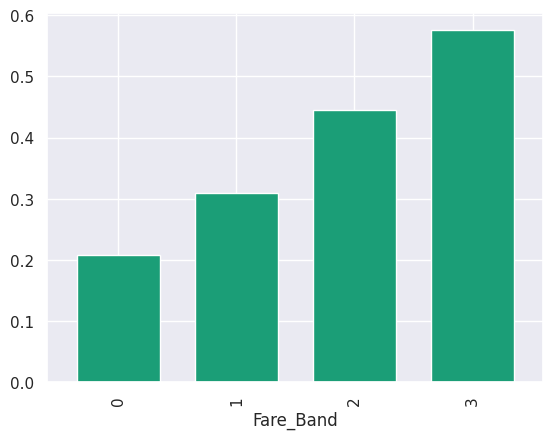

In [38]:
# the relationship between Fare Band and Survival Status: 

df.groupby(['Fare_Band'])['Survived'].mean().plot(kind='bar',
                                                  width=0.7) 

 ### **🛠️ 4. Create a new feature: Has_Cabin**  

In [39]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int)         

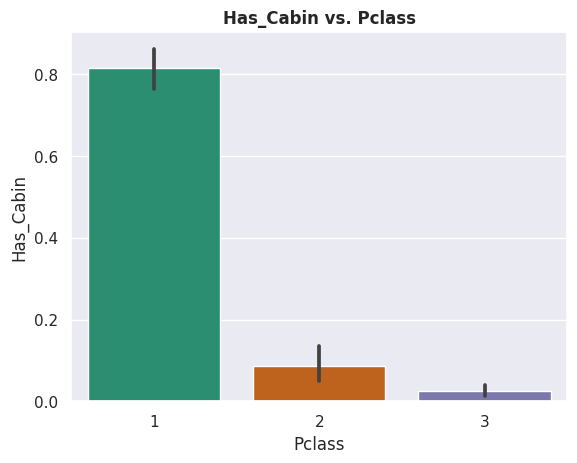

In [40]:
sns.barplot(data=df,
            x = 'Pclass', 
            y = 'Has_Cabin') 

plt.title('Has_Cabin vs. Pclass',
          fontweight='bold') 
plt.show() 


 === Contingency Table === 

Survived     0    1
Has_Cabin          
0          481  206
1           68  136 



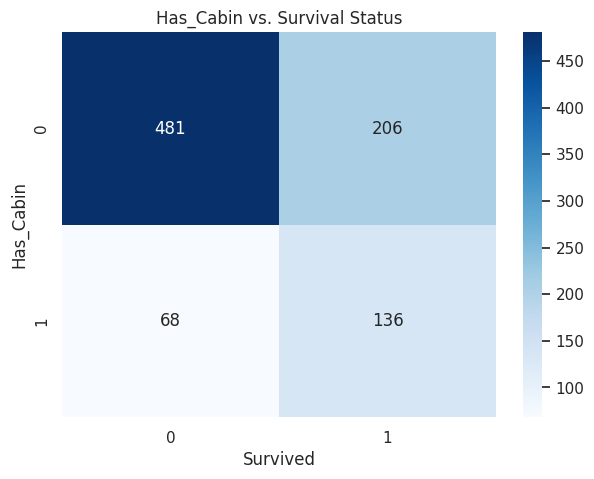

- Chi-square statistics:  87.9415
- P_value: 0.0000
- Degrees of freedom: 1
- Expected frequency: 
 [[423.3030303 263.6969697]
 [125.6969697  78.3030303]]


In [41]:
contingency_table = pd.crosstab(df['Has_Cabin'], df['Survived']) 
print('\n === Contingency Table === \n') 
print(contingency_table, '\n')


plt.figure(figsize=(7,5))  

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues') 

plt.title('Has_Cabin vs. Survival Status') 
plt.show() 

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'- Chi-square statistics: {chi2: .4f}') 
print(f'- P_value: {p:.4f}') 
print(f'- Degrees of freedom: {dof}') 
print(f'- Expected frequency: \n {expected}')  

### **🛠️ 5. Create a new feature: Family** 

In [42]:
df['Family'] = df['SibSp'] + df['Parch'] + 1 

most_family = np.where(df['Family'] == max(df['Family'])) 
df[['Name', 'Pclass', 'Family', 'Survived']].loc[most_family]        


,Name,Pclass,Family,Survived
159,"Sage, Master. Thomas Henry",3,11,0
180,"Sage, Miss. Constance Gladys",3,11,0
201,"Sage, Mr. Frederick",3,11,0
324,"Sage, Mr. George John Jr",3,11,0
792,"Sage, Miss. Stella Anna",3,11,0
846,"Sage, Mr. Douglas Bullen",3,11,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",3,11,0


In [43]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Survived                     891 non-null    int64   
 1   Pclass                       891 non-null    int64   
 2   Name                         891 non-null    object  
 3   Sex                          891 non-null    int64   
 4   Age                          714 non-null    float64 
 5   SibSp                        891 non-null    int64   
 6   Parch                        891 non-null    int64   
 7   Ticket                       891 non-null    object  
 8   Fare                         891 non-null    float64 
 9   Cabin                        204 non-null    object  
 10  Embarked                     889 non-null    object  
 11  Age_pmm                      891 non-null    float64 
 12  Q                            891 non-null    int64   
 13  S    

### **🛠️ 6. Drop Unwanted Features** 

In [44]:
df.drop(['Name','Embarked','Age','Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_pmm', 'Ticket_Prefix','Fare_Range'],
        axis=1, inplace=True)       

# 🤖   ***Machine Learning***   

In [45]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Survived                     891 non-null    int64  
 1   Pclass                       891 non-null    int64  
 2   Sex                          891 non-null    int64  
 3   SibSp                        891 non-null    int64  
 4   Parch                        891 non-null    int64  
 5   Q                            891 non-null    int64  
 6   S                            891 non-null    int64  
 7   Age_Band                     891 non-null    int64  
 8   Pclass_Prefix_Survival_Rate  891 non-null    float64
 9   Ticket_IsNumeric             891 non-null    int64  
 10  Ticket_Frequency             891 non-null    int64  
 11  Fare_Band                    891 non-null    int64  
 12  Has_Cabin                    891 non-null    int64  
 13  Family              

In [46]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Q', 'S', 'Age_Band',
       'Pclass_Prefix_Survival_Rate', 'Ticket_IsNumeric', 'Ticket_Frequency',
       'Fare_Band', 'Has_Cabin', 'Family'],
      dtype='object')

### 1. 🔍 **Modeling** 

In [47]:
X = df.drop('Survived', axis=1)     
y = df['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [49]:
# Logistic Regression: 

log_model = LogisticRegression()   
log_model.fit(X_train, y_train) 
predictions_log = log_model.predict(X_test) 

In [50]:
# K-Nearest Neighbours:

knn_model=KNeighborsClassifier()  
knn_model.fit(X_train, y_train)
predictions_knn = knn_model.predict(X_test)   

In [51]:
# Random Forest: 

rfc = RandomForestClassifier(class_weight='balanced',
                             n_estimators=100,
                             random_state=42)   
rfc.fit(X_train, y_train) 
predictions_rfc = rfc.predict(X_test)  

### 2. 🔍 **Evaluation**

In [52]:
print("\nLogistic Regression Report:\n", confusion_matrix(y_test, predictions_log), '\n', classification_report(y_test, predictions_log))
print("\n K-Nearest Neighbours :\n", confusion_matrix(y_test, predictions_knn),'\n',  classification_report(y_test,predictions_knn)) 
print("\nRandom Forest Report:\n", confusion_matrix(y_test, predictions_rfc),'\n',  classification_report(y_test, predictions_rfc)) 


Logistic Regression Report:
 [[137  20]
 [ 27  84]] 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       157
           1       0.81      0.76      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268


 K-Nearest Neighbours :
 [[140  17]
 [ 39  72]] 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.81      0.65      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268


Random Forest Report:
 [[133  24]
 [ 31  80]] 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy               

### 3. 🔍 **k-Fold Cross Validation**

In [53]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10, split the data into 10 equal parts 
cross_val_mean=[] 
std=[]
accuracy=[]

classifiers=['Logistic Regression','K-Nearest Neighbours','Random Forest'] 
models=[LogisticRegression(),
        KNeighborsClassifier(), 
        RandomForestClassifier(class_weight='balanced',n_estimators=100)] 

for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy") 
    cv_result=cv_result  
    cross_val_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result) 
    
models_df=pd.DataFrame({'CV Mean':cross_val_mean,
                        'Std':std},
                        index=classifiers)   

models_df 

,CV Mean,Std
Logistic Regression,0.808015,0.051768
K-Nearest Neighbours,0.808090,0.042723
Random Forest,0.813633,0.050204


### **Reference:**

#### Thanks a lot: 


